In [1]:
# وارد کردن کتابخانه‌های مورد نیاز
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [2]:
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install torch

You should consider upgrading via the 'O:\O drive\AI\my project\EEG classification(Deap)\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'O:\O drive\AI\my project\EEG classification(Deap)\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'O:\O drive\AI\my project\EEG classification(Deap)\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'O:\O drive\AI\my project\EEG classification(Deap)\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install pandas

You should consider upgrading via the 'O:\O drive\AI\my project\EEG classification(Deap)\venv\Scripts\python.exe -m pip install --upgrade pip' command.


DATA ANALYSIS:
Dataset Shape: (2132, 2549)

Columns in dataset:
['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a', 'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a', 'mean_d_0_a2', 'mean_d_1_a2', 'mean_d_2_a2', 'mean_d_3_a2', 'mean_d_4_a2', 'mean_d_5_a', 'mean_d_6_a', 'mean_d_7_a', 'mean_d_8_a', 'mean_d_9_a', 'mean_d_10_a', 'mean_d_11_a', 'mean_d_12_a', 'mean_d_13_a', 'mean_d_14_a', 'mean_d_15_a', 'mean_d_16_a', 'mean_d_17_a', 'mean_d_18_a', 'mean_d_19_a', 'mean_d_20_a', 'mean_d_21_a', 'mean_d_22_a', 'mean_d_23_a', 'mean_d_24_a', 'mean_d_25_a', 'mean_d_26_a', 'mean_d_27_a', 'mean_d_28_a', 'mean_d_29_a', 'mean_d_30_a', 'mean_d_31_a', 'mean_d_32_a', 'mean_d_33_a', 'mean_d_34_a', 'mean_d_35_a', 'mean_d_36_a', 'mean_d_37_a', 'mean_d_38_a', 'mean_d_39_a', 'mean_d_40_a', 'mean_d_41_a', 'mean_d_42_a', 'mean_d_43_a', 'mean_d_44_a', 'mean_d_45_a', 'mean_d_46_a', 'mean_d_47_a', 'mean_d_48_a', 'mean_d_49_a', 'stddev_0_a', 'stddev_1_a', 'stddev_2_a', 'stddev_3_a', 's

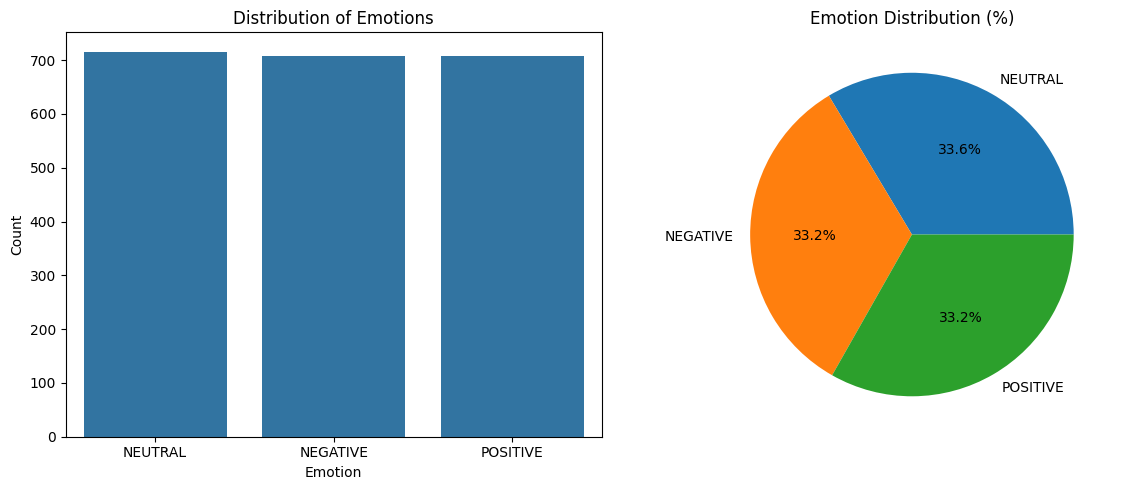

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

# 1. Load and examine the data
data_path = "O:\\O drive\\AI\\my project\\EEG classification(Deap)\\data\\emotions.csv"
df = pd.read_csv(data_path)

# 2. Basic data analysis
print("="*50)
print("DATA ANALYSIS:")
print("="*50)
print(f"Dataset Shape: {df.shape}")
print("\nColumns in dataset:")
print(df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
df.info()

# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# 4. Analyze target distribution
print("\nEmotion Class Distribution:")
emotion_dist = df['label'].value_counts()
print(emotion_dist)

# 5. Visualize emotion distribution
plt.figure(figsize=(12, 5))

# Bar plot
plt.subplot(1, 2, 1)
sns.barplot(x=emotion_dist.index, y=emotion_dist.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(emotion_dist.values, labels=emotion_dist.index, autopct='%1.1f%%')
plt.title('Emotion Distribution (%)')

plt.tight_layout()
plt.show()


In [5]:

# 6. Prepare data for modeling
# Separate features and target
X = df.drop('label', axis=1)  # Assuming 'emotion' is the target column
y = df['label']

# Encode labels
le = LabelEncoder()
y = le.fit_transform(y)
print("\nEncoded emotion classes:", le.classes_)

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Create PyTorch Dataset class
class EEGEmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]



Encoded emotion classes: ['NEGATIVE' 'NEUTRAL' 'POSITIVE']



Final data shapes:
Training set: (1492, 2548)
Validation set: (320, 2548)
Test set: (320, 2548)


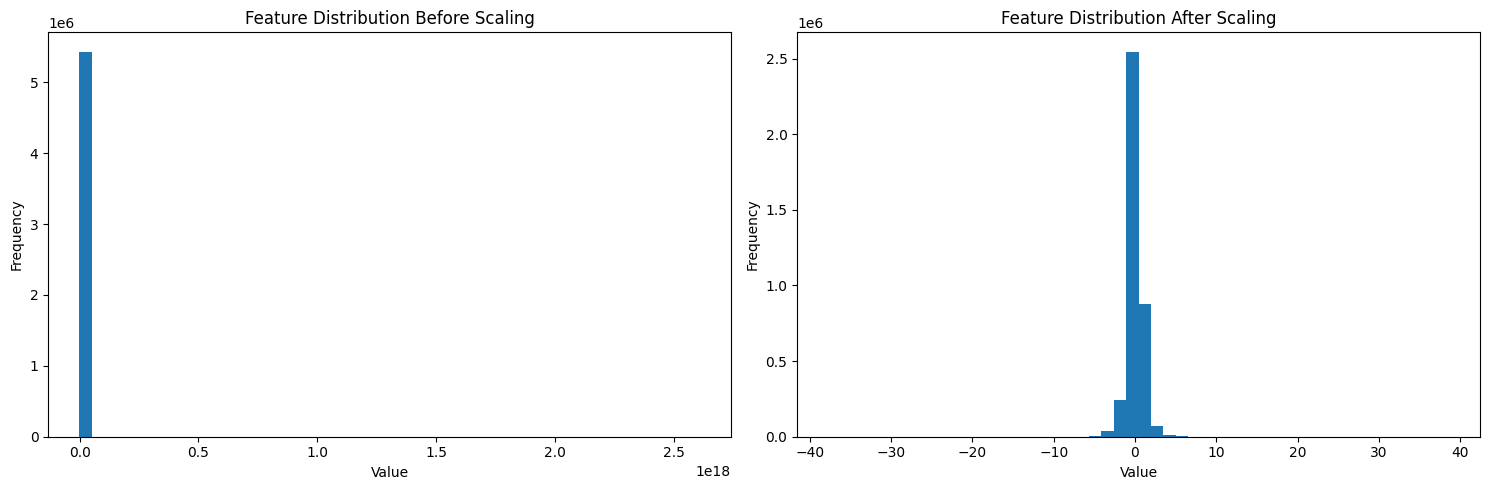


Preprocessing Summary:
n_samples: 2132
n_features: 2548
n_classes: 3
class_distribution: {'NEUTRAL': 716, 'NEGATIVE': 708, 'POSITIVE': 708}
encoded_classes: ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
train_samples: 1492
val_samples: 320
test_samples: 320


In [6]:

# Create data loaders
batch_size = 32
train_dataset = EEGEmotionDataset(X_train, y_train)
val_dataset = EEGEmotionDataset(X_val, y_val)
test_dataset = EEGEmotionDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Print final shapes
print("\nFinal data shapes:")
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Visualize feature distributions
plt.figure(figsize=(15, 5))

# Before scaling
plt.subplot(1, 2, 1)
plt.hist(X.values.ravel(), bins=50)
plt.title('Feature Distribution Before Scaling')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After scaling
plt.subplot(1, 2, 2)
plt.hist(X_train.ravel(), bins=50)
plt.title('Feature Distribution After Scaling')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Save preprocessing info
preprocessing_info = {
    'n_samples': len(df),
    'n_features': X.shape[1],
    'n_classes': len(np.unique(y)),
    'class_distribution': emotion_dist.to_dict(),
    'encoded_classes': le.classes_.tolist(),
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test)
}

print("\nPreprocessing Summary:")
for key, value in preprocessing_info.items():
    print(f"{key}: {value}")

In [7]:
# بررسی آماری داده‌ها
print("توصیف آماری داده‌ها:")
print(df.describe())

# نمایش نام ستون‌ها
print("\nنام ستون‌های موجود در دیتاست:")
print(df.columns.tolist())

توصیف آماری داده‌ها:
        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000   
mean     15.256914    27.012462  -104.975629    13.605898    24.150483   
std      15.284621     9.265141   206.271960    16.874676    14.187340   
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000   
25%       6.577500    26.075000  -195.000000     4.857500    23.600000   
50%      14.100000    30.000000    14.950000    15.400000    25.200000   
75%      27.700000    31.400000    29.600000    26.500000    26.800000   
max     304.000000    42.300000   661.000000   206.000000   213.000000   

        mean_d_0_a   mean_d_1_a   mean_d_2_a   mean_d_3_a   mean_d_4_a  ...  \
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000  ...   
mean      0.025378     0.052282     0.301655     0.036793     0.083567  ...   
std      17.981796     8.509174    68.098894    17.010031    18.935378  ...

تعداد مقادیر گمشده در هر ستون:
هیچ مقدار گمشده‌ای وجود ندارد!


<Figure size 1500x600 with 0 Axes>

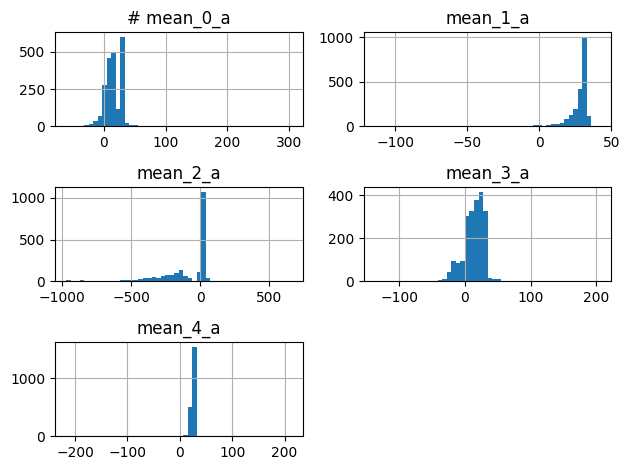

In [8]:
# بررسی مقادیر گمشده
missing_values = df.isnull().sum()
print("تعداد مقادیر گمشده در هر ستون:")
print(missing_values[missing_values > 0] if missing_values.any() else "هیچ مقدار گمشده‌ای وجود ندارد!")

# رسم نمودار توزیع برای چند ستون اول
plt.figure(figsize=(15, 6))
df.iloc[:, :5].hist(bins=50)
plt.tight_layout()
plt.show()

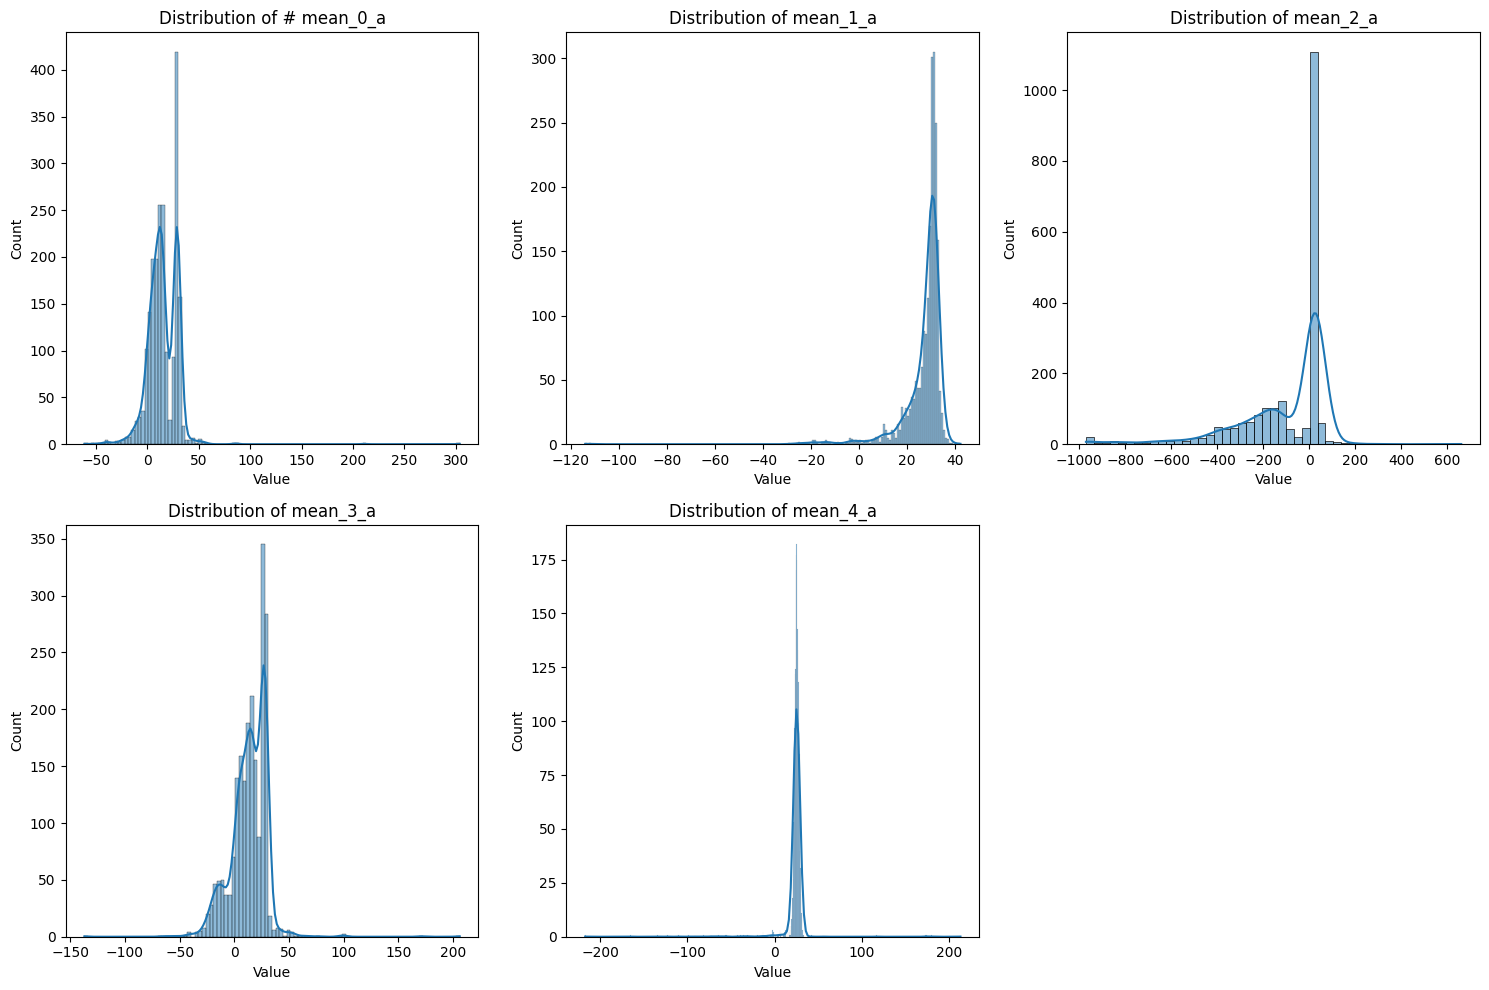


Basic statistics for selected features:
        # mean_0_a     mean_1_a     mean_2_a     mean_3_a     mean_4_a
count  2132.000000  2132.000000  2132.000000  2132.000000  2132.000000
mean     15.256914    27.012462  -104.975629    13.605898    24.150483
std      15.284621     9.265141   206.271960    16.874676    14.187340
min     -61.300000  -114.000000  -970.000000  -137.000000  -217.000000
25%       6.577500    26.075000  -195.000000     4.857500    23.600000
50%      14.100000    30.000000    14.950000    15.400000    25.200000
75%      27.700000    31.400000    29.600000    26.500000    26.800000
max     304.000000    42.300000   661.000000   206.000000   213.000000


In [9]:
# Select first 5 features for distribution analysis
features_to_plot = df.columns[:5]

# Create distribution plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate basic statistics for these features
print("\nBasic statistics for selected features:")
print(df[features_to_plot].describe())

# Data Prepration

In [10]:
! pip install tqdm

You should consider upgrading via the 'O:\O drive\AI\my project\EEG classification(Deap)\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


GENERAL DATA INFORMATION:
Total data shape (X): (2132, 2548)
Labels shape (y): (2132,)

Total number of samples: 2132
Number of features: 2548
Number of classes: 3

CLASS DISTRIBUTION:
   Class  Count  Percentage
0      0    708       33.21
1      1    716       33.58
2      2    708       33.21


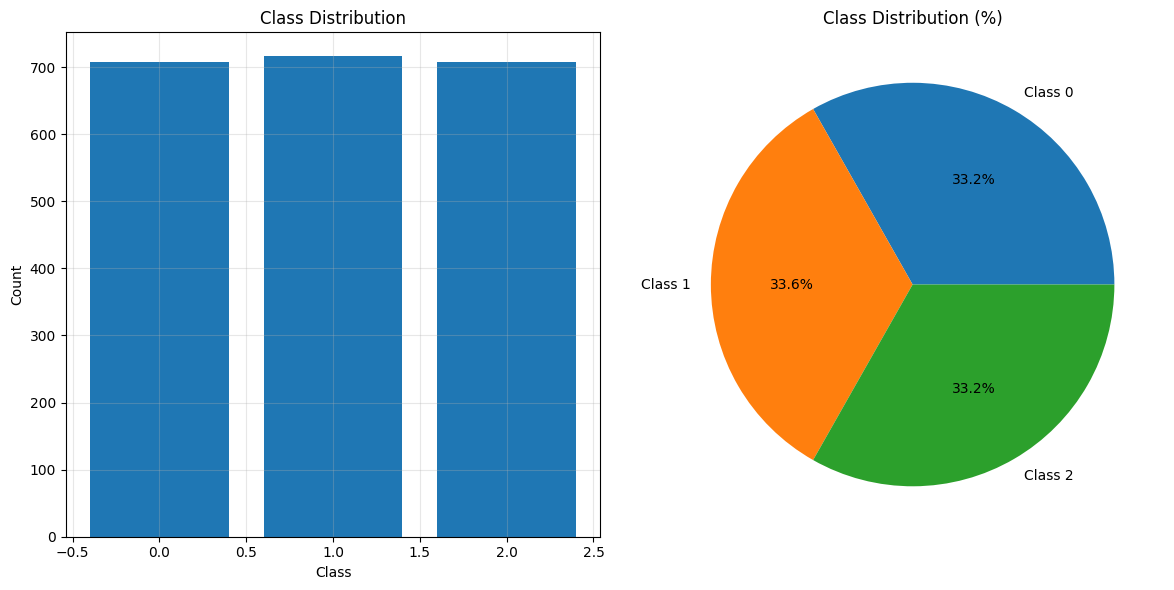


DATASET SPLIT DISTRIBUTION:
Training set: (1492, 2548) samples
Validation set: (320, 2548) samples
Test set: (320, 2548) samples


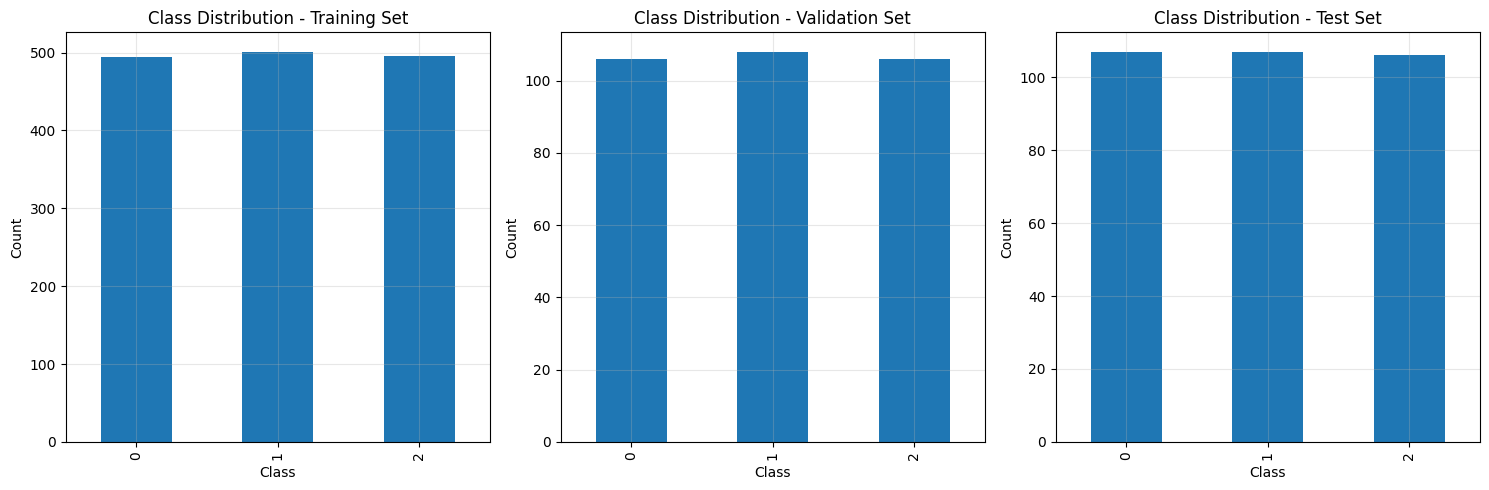


FEATURE STATISTICS:

Overall Feature Statistics:
               Mean           Std           Min           Max        Median
count  2.548000e+03  2.548000e+03  2.548000e+03  2.548000e+03  2.548000e+03
mean   3.698733e+12  6.924876e+13 -1.340086e+12  2.310446e+15  1.280367e+07
std    1.236224e+14  2.229805e+15  4.432496e+13  7.339264e+16  4.243918e+08
min   -5.109582e+11  2.625811e-01 -1.580000e+15 -3.040000e+01 -9.220000e+06
25%   -5.016492e+01  1.037520e+02 -1.250000e+03  8.370000e+02 -2.020000e+01
50%   -1.245028e-01  2.035114e+02 -8.150000e+02  9.995000e+02  1.010000e+01
75%    1.008842e+02  2.930487e+02 -5.010000e+02  1.670000e+03  1.685000e+01
max    4.410828e+15  7.937123e+16  1.680000e+09  2.610000e+18  1.515000e+10

DATA SCALING COMPARISON (Before vs After Standardization):

Before Standardization:
Mean: 3698733411117.964


TypeError: unsupported format string passed to Series.__format__

In [12]:
# 1. General Data Information
print("="*50)
print("GENERAL DATA INFORMATION:")
print("="*50)
print(f"Total data shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")
print(f"\nTotal number of samples: {len(X)}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# 2. Class Distribution Analysis
print("\n" + "="*50)
print("CLASS DISTRIBUTION:")
print("="*50)
unique_labels, counts = np.unique(y, return_counts=True)
class_distribution = pd.DataFrame({
    'Class': unique_labels,
    'Count': counts,
    'Percentage': (counts/len(y)*100).round(2)
})
print(class_distribution)

# 3. Visualize Class Distribution
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
plt.bar(unique_labels, counts)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=[f'Class {l}' for l in unique_labels], autopct='%1.1f%%')
plt.title('Class Distribution (%)')
plt.tight_layout()
plt.show()

# 4. Dataset Split Distribution
print("\n" + "="*50)
print("DATASET SPLIT DISTRIBUTION:")
print("="*50)
print(f"Training set: {X_train.shape} samples")
print(f"Validation set: {X_val.shape} samples")
print(f"Test set: {X_test.shape} samples")

# 5. Class Distribution in Each Split
train_dist = pd.Series(y_train).value_counts().sort_index()
val_dist = pd.Series(y_val).value_counts().sort_index()
test_dist = pd.Series(y_test).value_counts().sort_index()

plt.figure(figsize=(15, 5))

# Training set distribution
plt.subplot(1, 3, 1)
train_dist.plot(kind='bar')
plt.title('Class Distribution - Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Validation set distribution
plt.subplot(1, 3, 2)
val_dist.plot(kind='bar')
plt.title('Class Distribution - Validation Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Test set distribution
plt.subplot(1, 3, 3)
test_dist.plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Feature Statistics
print("\n" + "="*50)
print("FEATURE STATISTICS:")
print("="*50)
feature_stats = pd.DataFrame({
    'Mean': np.mean(X, axis=0),
    'Std': np.std(X, axis=0),
    'Min': np.min(X, axis=0),
    'Max': np.max(X, axis=0),
    'Median': np.median(X, axis=0)
})
print("\nOverall Feature Statistics:")
print(feature_stats.describe())

# 7. Data Scaling Comparison
print("\n" + "="*50)
print("DATA SCALING COMPARISON (Before vs After Standardization):")
print("="*50)
print("\nBefore Standardization:")
print(f"Mean: {np.mean(X):.3f}")
print(f"Standard Deviation: {np.std(X):.3f}")
print("\nAfter Standardization (Training Set):")
print(f"Mean: {np.mean(X_train):.3f}")
print(f"Standard Deviation: {np.std(X_train):.3f}")

# 8. Final Data Shape for CNN
print("\n" + "="*50)
print("FINAL DATA SHAPE FOR CNN:")
print("="*50)
print(f"Training data shape: {X_train.shape} (samples, channels, window_size)")
print(f"Number of channels: {n_channels}")
print(f"Window size: {window_size}")

# 9. Additional Visualizations
plt.figure(figsize=(15, 5))

# Feature distribution before standardization
plt.subplot(1, 2, 1)
plt.hist(X.ravel(), bins=50)
plt.title('Feature Distribution Before Standardization')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Feature distribution after standardization
plt.subplot(1, 2, 2)
plt.hist(X_train.ravel(), bins=50)
plt.title('Feature Distribution After Standardization')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 10. Class Balance Analysis
print("\n" + "="*50)
print("CLASS BALANCE ANALYSIS:")
print("="*50)
class_ratios = counts / len(y)
print("\nClass Ratios:")
for label, ratio in zip(unique_labels, class_ratios):
    print(f"Class {label}: {ratio:.3f}")

imbalance_ratio = np.max(class_ratios) / np.min(class_ratios)
print(f"\nImbalance Ratio (max/min): {imbalance_ratio:.2f}")

# Save analysis results to file
analysis_results = {
    'total_samples': len(X),
    'n_features': X.shape[1],
    'n_classes': len(np.unique(y)),
    'class_distribution': class_distribution.to_dict(),
    'train_samples': len(X_train),
    'val_samples': len(X_val),
    'test_samples': len(X_test),
    'imbalance_ratio': imbalance_ratio,
    'feature_stats': feature_stats.describe().to_dict()
}

# Save to JSON file
import json
with open('data_analysis_results.json', 'w') as f:
    json.dump(analysis_results, f, indent=4)
print("\nAnalysis results have been saved to 'data_analysis_results.json'")

In [13]:
print(len(train_loader))

47


# train-validate-test

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve
import itertools

# 2. Modified EEGNet Model
class EEGNet(nn.Module):
    def __init__(self, input_size, n_classes):
        super(EEGNet, self).__init__()
        
        # First block - Temporal convolution
        self.conv1 = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(2)
        )
        
        # Second block - Spatial convolution
        self.conv2 = nn.Sequential(
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(2)
        )
        
        # Third block
        self.conv3 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(2)
        )
        
        # Calculate the size of flattened features
        self._to_linear = None
        self._get_flat_features(input_size)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(self._to_linear, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes)
        )
        
    def _get_flat_features(self, input_size):
        x = torch.randn(1, 1, input_size)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        self._to_linear = x.view(1, -1).size(1)
    
    def forward(self, x):
        # Reshape input to (batch_size, channels=1, features)
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 3. Training Setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Model initialization
input_size = X_train.shape[1]
n_classes = len(np.unique(y))
model = EEGNet(input_size, n_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# Early stopping
early_stopping = EarlyStopping(patience=10, min_delta=1e-4)

# 4. Training Loop
n_epochs = 100
history = {
    'train_loss': [], 'val_loss': [],
    'train_metrics': [], 'val_metrics': []
}

print("Starting training...")
for epoch in tqdm(range(n_epochs)):
    # Training
    train_loss, train_metrics = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # Validation
    val_loss, val_metrics = validate(model, val_loader, criterion, device)
    
    # Update learning rate
    scheduler.step(val_loss)
    
    # Store history
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)
    history['train_metrics'].append(train_metrics)
    history['val_metrics'].append(val_metrics)
    
    # Early stopping
    if early_stopping(val_loss, model):
        print(f"\nEarly stopping triggered at epoch {epoch}")
        model.load_state_dict(early_stopping.best_model)
        break
    
    # Print progress
    if (epoch + 1) % 5 == 0:
        print(f"\nEpoch {epoch+1}/{n_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        print(f"Train Acc: {train_metrics['accuracy']:.4f}, Val Acc: {val_metrics['accuracy']:.4f}")



Using device: cpu
Starting training...


  0%|          | 0/100 [00:00<?, ?it/s]


NameError: name 'train_epoch' is not defined

In [16]:
def print_detailed_metrics(test_metrics, history):
    """
    Print detailed evaluation metrics and save them to a file
    """
    print("\n" + "="*50)
    print("MODEL EVALUATION METRICS")
    print("="*50)
    
    print("\n1. FINAL TEST METRICS:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
    if 'auc_roc' in test_metrics:
        print(f"Test AUC-ROC: {test_metrics['auc_roc']:.4f}")
    
    print("\n2. CLASSIFICATION REPORT:")
    print(test_metrics['classification_report'])
    
    print("\n3. PER-CLASS METRICS:")
    cm = test_metrics['confusion_matrix']
    n_classes = cm.shape[0]
    
    for i in range(n_classes):
        print(f"\nClass {i}:")
        # Calculate metrics for each class
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        
        # Calculate metrics
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
        
        print(f"Sensitivity (Recall): {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"F1-Score: {f1:.4f}")
    
    print("\n4. TRAINING SUMMARY:")
    print(f"Best Validation Loss: {min(history['val_loss']):.4f}")
    best_val_acc = max(m['accuracy'] for m in history['val_metrics'])
    print(f"Best Validation Accuracy: {best_val_acc:.4f}")
    print(f"Number of Epochs Trained: {len(history['train_loss'])}")
    
    # Save metrics to file
    results_dict = {
        'test_loss': test_loss,
        'test_accuracy': test_metrics['accuracy'],
        'best_val_loss': min(history['val_loss']),
        'best_val_accuracy': best_val_acc,
        'n_epochs': len(history['train_loss']),
        'classification_report': test_metrics['classification_report']
    }
    if 'auc_roc' in test_metrics:
        results_dict['test_auc_roc'] = test_metrics['auc_roc']
    
    # Save results to CSV
    import pandas as pd
    pd.DataFrame([results_dict]).to_csv('model_metrics.csv', index=False)
    print("\nMetrics have been saved to 'model_metrics.csv'")
    
    return results_dict

In [71]:
import itertools
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix, classification_report, roc_auc_score, accuracy_score


Performing final evaluation...

MODEL EVALUATION METRICS

1. FINAL TEST METRICS:
Test Loss: 0.0487
Test Accuracy: 0.9875
Test AUC-ROC: 0.9995

2. CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       107
           1       1.00      0.98      0.99       107
           2       0.97      0.99      0.98       106

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320


3. PER-CLASS METRICS:

Class 0:
Sensitivity (Recall): 0.9907
Specificity: 0.9953
Precision: 0.9907
F1-Score: 0.9907

Class 1:
Sensitivity (Recall): 0.9813
Specificity: 1.0000
Precision: 1.0000
F1-Score: 0.9906

Class 2:
Sensitivity (Recall): 0.9906
Specificity: 0.9860
Precision: 0.9722
F1-Score: 0.9813

4. TRAINING SUMMARY:
Best Validation Loss: 0.0665
Best Validation Accuracy: 0.9875
Number of Epochs Trained: 51

Metrics have been saved to 'mo

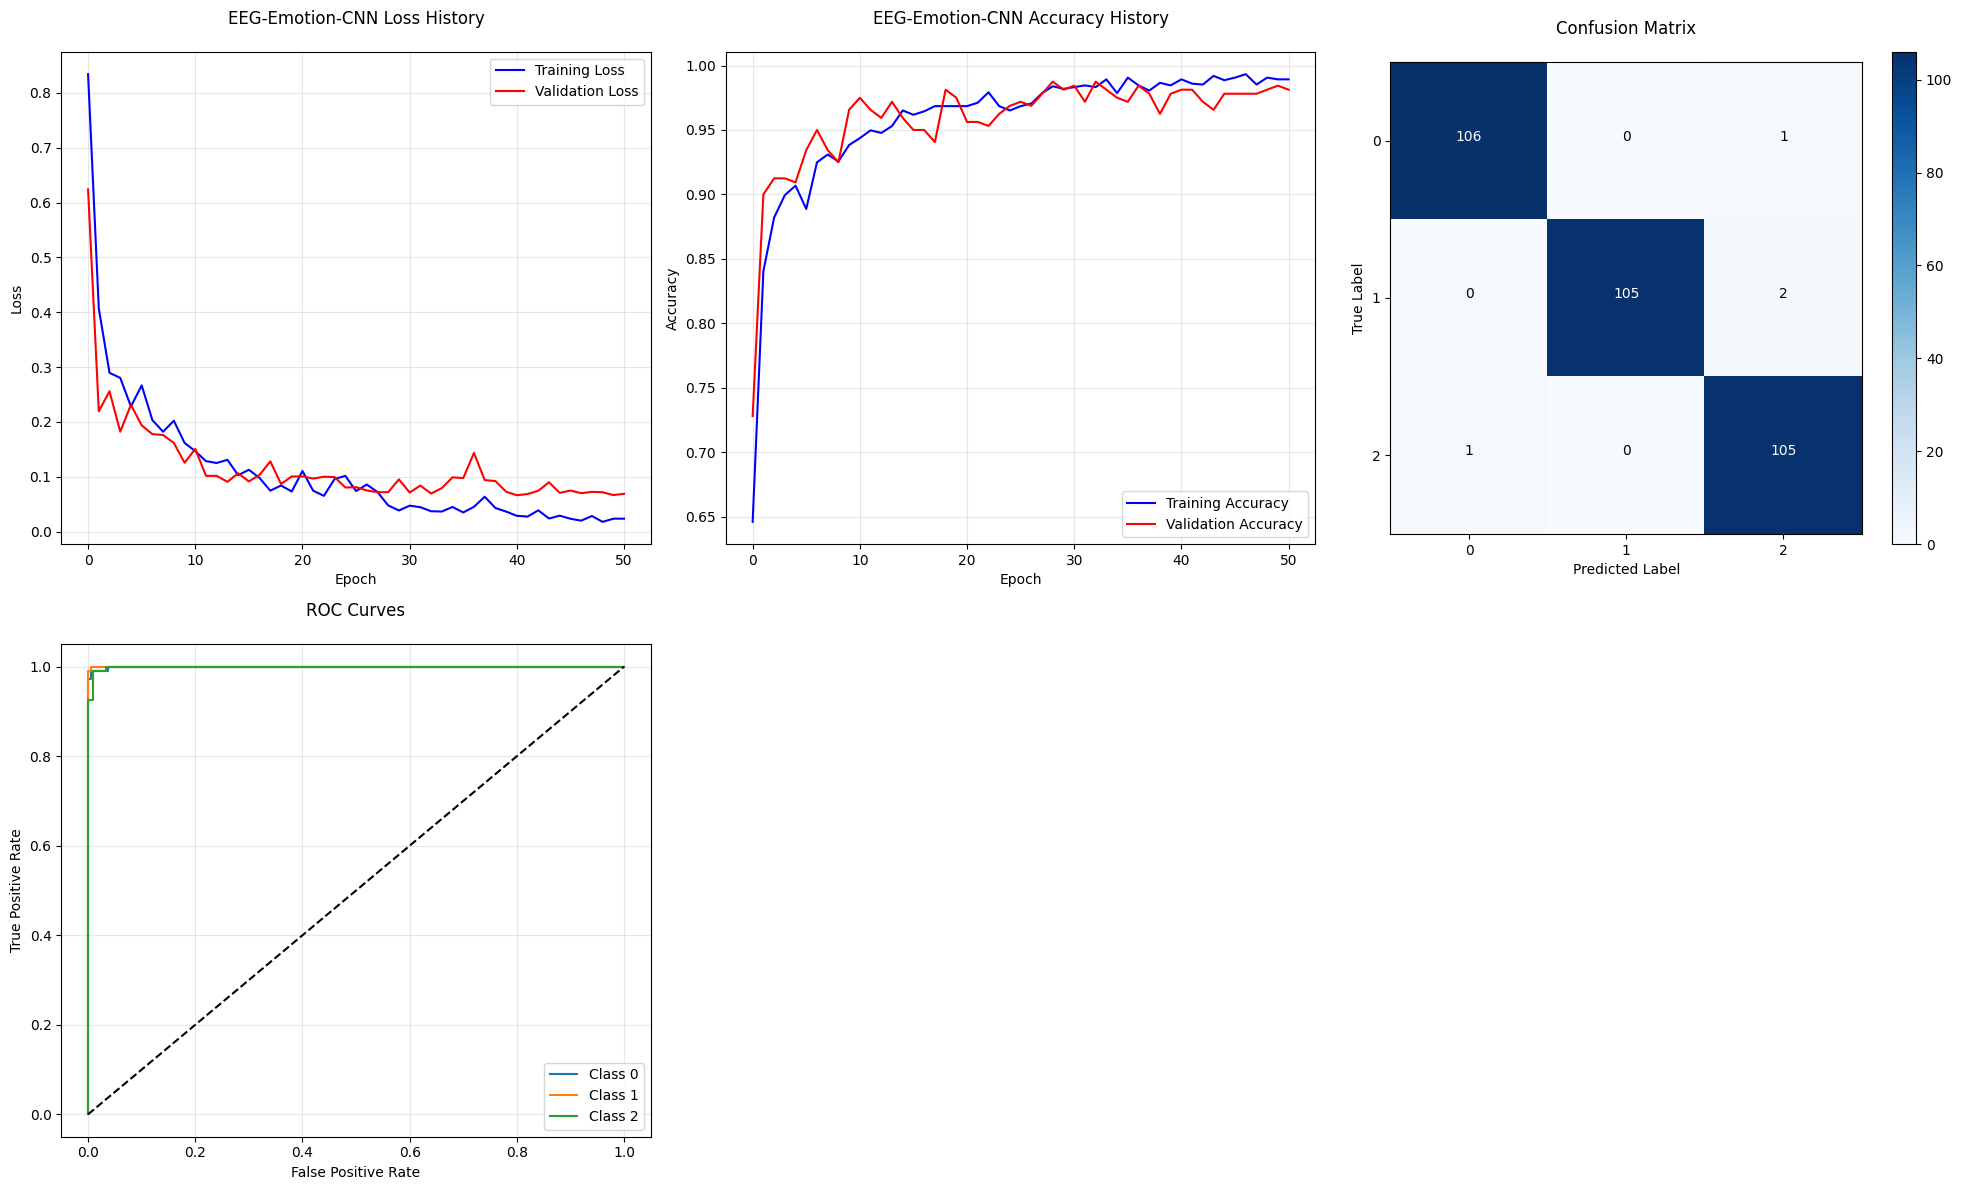


Model and results saved to 'eeg_emotion_model.pth'


In [76]:
# 5. Final Evaluation
print("\nPerforming final evaluation...")
test_loss, test_metrics = validate(model, test_loader, criterion, device)
print_detailed_metrics(test_metrics, history)
plot_metrics(history, test_metrics, model_name="EEG-Emotion-CNN")

# 6. Save the model
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'history': history,
    'test_metrics': test_metrics,
    'class_labels': le.classes_
}, 'eeg_emotion_model.pth')

print("\nModel and results saved to 'eeg_emotion_model.pth'")

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, roc_curve

# 1. بارگذاری و بررسی داده‌ها
data_path = "O:\\O drive\\AI\\my project\\EEG classification(Deap)\\data\\emotions.csv"
df = pd.read_csv(data_path)

# 2. جداسازی ویژگی‌ها و برچسب‌ها
X = df.drop('label', axis=1)
y = df['label']

# 3. کدگذاری برچسب‌ها
le = LabelEncoder()
y = le.fit_transform(y)
print("\nکلاس‌های احساسی کدگذاری شده:", le.classes_)

# 4. تقسیم داده‌ها
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# 5. نرمال‌سازی ویژگی‌ها
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 6. تعریف کلاس Dataset
class EEGEmotionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.LongTensor(y)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 7. تعریف معماری مدل
class EEGNet(nn.Module):
    def __init__(self, input_size, n_classes):
        super(EEGNet, self).__init__()
        
        # First block - Temporal convolution
        self.conv1 = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(2)
        )
        
        # Second block - Spatial convolution
        self.conv2 = nn.Sequential(
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(2)
        )
        
        # Third block
        self.conv3 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.MaxPool1d(2)
        )
        
        # Calculate the size of flattened features
        self._to_linear = None
        self._get_flat_features(input_size)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(self._to_linear, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, n_classes)
        )
        
    def _get_flat_features(self, input_size):
        x = torch.randn(1, 1, input_size)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        self._to_linear = x.view(1, -1).size(1)
    
    def forward(self, x):
        x = x.unsqueeze(1)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# 8. توابع آموزش و ارزیابی
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    for batch_X, batch_y in tqdm(train_loader, desc="Training"):
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        _, preds = torch.max(outputs, 1)
        probs = torch.softmax(outputs, dim=1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch_y.cpu().numpy())
        all_probs.extend(probs.detach().cpu().numpy())
    
    metrics = calculate_metrics(np.array(all_labels), np.array(all_preds), np.array(all_probs))
    avg_loss = total_loss / len(train_loader)
    
    return avg_loss, metrics

def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for batch_X, batch_y in tqdm(val_loader, desc="Validating"):
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            total_loss += loss.item()
            
            _, preds = torch.max(outputs, 1)
            probs = torch.softmax(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    metrics = calculate_metrics(np.array(all_labels), np.array(all_preds), np.array(all_probs))
    avg_loss = total_loss / len(val_loader)
    
    return avg_loss, metrics

def calculate_metrics(y_true, y_pred, y_prob):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'classification_report': classification_report(y_true, y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'auc_roc': roc_auc_score(y_true, y_prob, multi_class='ovr'),
        'y_true': y_true,
        'y_prob': y_prob
    }
    return metrics

def plot_metrics(history, test_metrics, model_name="EEG-Emotion-CNN"):
    plt.figure(figsize=(15, 10))
    
    # نمودار loss
    plt.subplot(2, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # نمودار accuracy
    plt.subplot(2, 2, 2)
    train_acc = [m['accuracy'] for m in history['train_metrics']]
    val_acc = [m['accuracy'] for m in history['val_metrics']]
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    
    # ماتریس درهم‌ریختگی
    plt.subplot(2, 2, 3)
    cm = test_metrics['confusion_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # نمودار ROC
    plt.subplot(2, 2, 4)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = cm.shape[0]
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_metrics['y_true'] == i, test_metrics['y_prob'][:, i])
        roc_auc[i] = roc_auc_score(test_metrics['y_true'] == i, test_metrics['y_prob'][:, i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_metrics.png')
    plt.close()

def print_detailed_metrics(test_metrics, history):
    print("\n" + "="*50)
    print("MODEL EVALUATION METRICS")
    print("="*50)
    
    print("\n1. FINAL TEST METRICS:")
    print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"Test AUC-ROC: {test_metrics['auc_roc']:.4f}")
    
    print("\n2. CLASSIFICATION REPORT:")
    print(test_metrics['classification_report'])
    
    print("\n3. PER-CLASS METRICS:")
    cm = test_metrics['confusion_matrix']
    n_classes = cm.shape[0]
    
    for i in range(n_classes):
        print(f"\nClass {i}:")
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        
        sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
        
        print(f"Sensitivity (Recall): {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"F1-Score: {f1:.4f}")
    
    results_dict = {
        'test_accuracy': test_metrics['accuracy'],
        'test_auc_roc': test_metrics['auc_roc'],
        'classification_report': test_metrics['classification_report'],
        'confusion_matrix': test_metrics['confusion_matrix'].tolist()
    }
    
    pd.DataFrame([results_dict]).to_csv('model_metrics.csv', index=False)
    print("\nMetrics have been saved to 'model_metrics.csv'")
    
    return results_dict

# 9. تابع اصلی
def main():
    # تنظیمات اولیه
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")
    
    # پارامترهای آموزش
    batch_size = 32
    n_epochs = 100
    learning_rate = 0.001
    patience = 10
    
    # ایجاد DataLoaderها
    train_dataset = EEGEmotionDataset(X_train, y_train)
    val_dataset = EEGEmotionDataset(X_val, y_val)
    test_dataset = EEGEmotionDataset(X_test, y_test)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # ایجاد مدل
    input_size = X_train.shape[1]
    n_classes = len(np.unique(y))
    model = EEGNet(input_size, n_classes).to(device)
    
    # تابع هزینه و بهینه‌ساز
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.1, patience=5, verbose=True
    )
    
    # آموزش مدل
    history = {
        'train_loss': [], 'val_loss': [],
        'train_metrics': [], 'val_metrics': []
    }
    
    best_val_loss = float('inf')
    patience_counter = 0
    
    print("Starting training...")
    for epoch in range(n_epochs):
        # آموزش
        train_loss, train_metrics = train_epoch(
            model, train_loader, criterion, optimizer, device
        )
        
        # اعتبارسنجی
        val_loss, val_metrics = validate(model, val_loader, criterion, device)
        
        # به‌روزرسانی نرخ یادگیری
        scheduler.step(val_loss)
        
        # ذخیره تاریخچه
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_metrics'].append(train_metrics)
        history['val_metrics'].append(val_metrics)
        
        # چاپ پیشرفت
        if (epoch + 1) % 5 == 0:
            print(f"\nEpoch {epoch+1}/{n_epochs}")
            print(f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
            print(f"Train Acc: {train_metrics['accuracy']:.4f}, Val Acc: {val_metrics['accuracy']:.4f}")
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
            # ذخیره بهترین مدل
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'val_loss': val_loss,
                'val_metrics': val_metrics,
                'history': history,
                'class_labels': le.classes_
            }, 'eeg_emotion_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"\nEarly stopping triggered at epoch {epoch}")
                break
    
    # ارزیابی نهایی
    print("\nPerforming final evaluation...")
    test_loss, test_metrics = validate(model, test_loader, criterion, device)
    print_detailed_metrics(test_metrics, history)
    plot_metrics(history, test_metrics, model_name="EEG-Emotion-CNN")

if __name__ == "__main__":
    main()


کلاس‌های احساسی کدگذاری شده: ['NEGATIVE' 'NEUTRAL' 'POSITIVE']
Using device: cpu
Starting training...


Validating: 100%|██████████| 10/10 [00:00<00:00, 120.29it/s]



Epoch 5/100
Train Loss: 0.2510, Val Loss: 0.2322
Train Acc: 0.9068, Val Acc: 0.9250


Validating: 100%|██████████| 10/10 [00:00<00:00, 102.37it/s]



Epoch 10/100
Train Loss: 0.1657, Val Loss: 0.1955
Train Acc: 0.9377, Val Acc: 0.9313


Validating: 100%|██████████| 10/10 [00:00<00:00, 105.54it/s]



Epoch 15/100
Train Loss: 0.1511, Val Loss: 0.1484
Train Acc: 0.9363, Val Acc: 0.9531


Validating: 100%|██████████| 10/10 [00:00<00:00, 101.78it/s]



Epoch 20/100
Train Loss: 0.0898, Val Loss: 0.1458
Train Acc: 0.9618, Val Acc: 0.9656


Validating: 100%|██████████| 10/10 [00:00<00:00, 97.05it/s]



Epoch 25/100
Train Loss: 0.0787, Val Loss: 0.1500
Train Acc: 0.9584, Val Acc: 0.9781


Validating: 100%|██████████| 10/10 [00:00<00:00, 107.40it/s]



Epoch 30/100
Train Loss: 0.0748, Val Loss: 0.1560
Train Acc: 0.9712, Val Acc: 0.9781

Early stopping triggered at epoch 29

Performing final evaluation...


Validating: 100%|██████████| 10/10 [00:00<00:00, 98.57it/s]



MODEL EVALUATION METRICS

1. FINAL TEST METRICS:
Test Accuracy: 0.9844
Test AUC-ROC: 0.9965

2. CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       1.00      0.99      1.00       107
           2       0.96      0.99      0.98       106

    accuracy                           0.98       320
   macro avg       0.98      0.98      0.98       320
weighted avg       0.98      0.98      0.98       320


3. PER-CLASS METRICS:

Class 0:
Sensitivity (Recall): 0.9720
Specificity: 0.9953
Precision: 0.9905
F1-Score: 0.9811

Class 1:
Sensitivity (Recall): 0.9907
Specificity: 1.0000
Precision: 1.0000
F1-Score: 0.9953

Class 2:
Sensitivity (Recall): 0.9906
Specificity: 0.9813
Precision: 0.9633
F1-Score: 0.9767

Metrics have been saved to 'model_metrics.csv'
